In [54]:
import xlrd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import math

%matplotlib inline

# 修正中文显示问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


plt.rcParams['savefig.dpi'] = 1024 #图片像素
plt.rcParams['figure.dpi'] = 1024 #分辨率

In [55]:
path = '/home/gray/desktop/stat/'
filenames = os.listdir(path)
print(filenames)

['1 第4部分-西北工业大学标准修改建议表20210604 的副本.xlsx', '16 第4部分-华为公司标准修改建议表202106.xlsx', '16 第4部分-长虹佳华公司第1次标准修改建议表.xlsx', '23 7.20 dell.xlsx', '23 第四部分-海康威视公司标准修改建议表结果.xlsx', '4 第4部分-中国地质大学标准修改建议表.xlsx', '8 第4部分-浪潮信息标准修改建议表.xlsx', '~$1 第4部分-西北工业大学标准修改建议表20210604 的副本.xlsx', '~$23 7.20 dell.xlsx']


In [56]:
counters = {}
invalid_keys = ['','华中科技大学','提出单位']
for filename in filenames:
    if filename.startswith('~'):
        continue
    fpath = os.path.join(path, filename)
    
    workbook = xlrd.open_workbook(filename=fpath)
    sheet_names = workbook.sheet_names()
    for sname in sheet_names:
        worksheet  = workbook.sheet_by_name(sname)
        for i in range(worksheet.nrows):
            k_flag = worksheet.row_values(i)[4]
            if k_flag in invalid_keys:
                continue
            if k_flag not in counters.keys():
                counters[k_flag] = 0
            counters[k_flag] += 1
    
print(counters)

{'西北工业大学': 222, '华为技术有限公司': 21, '长虹佳华': 232, 'EMC': 990, '海康威视': 13, '中国地质大学': 67, '浪潮': 17}


In [57]:
type(worksheet.row_values(i))

list

In [58]:
counters

{'西北工业大学': 222,
 '华为技术有限公司': 21,
 '长虹佳华': 232,
 'EMC': 990,
 '海康威视': 13,
 '中国地质大学': 67,
 '浪潮': 17}

In [59]:
print(sum(counters.values()))

1562


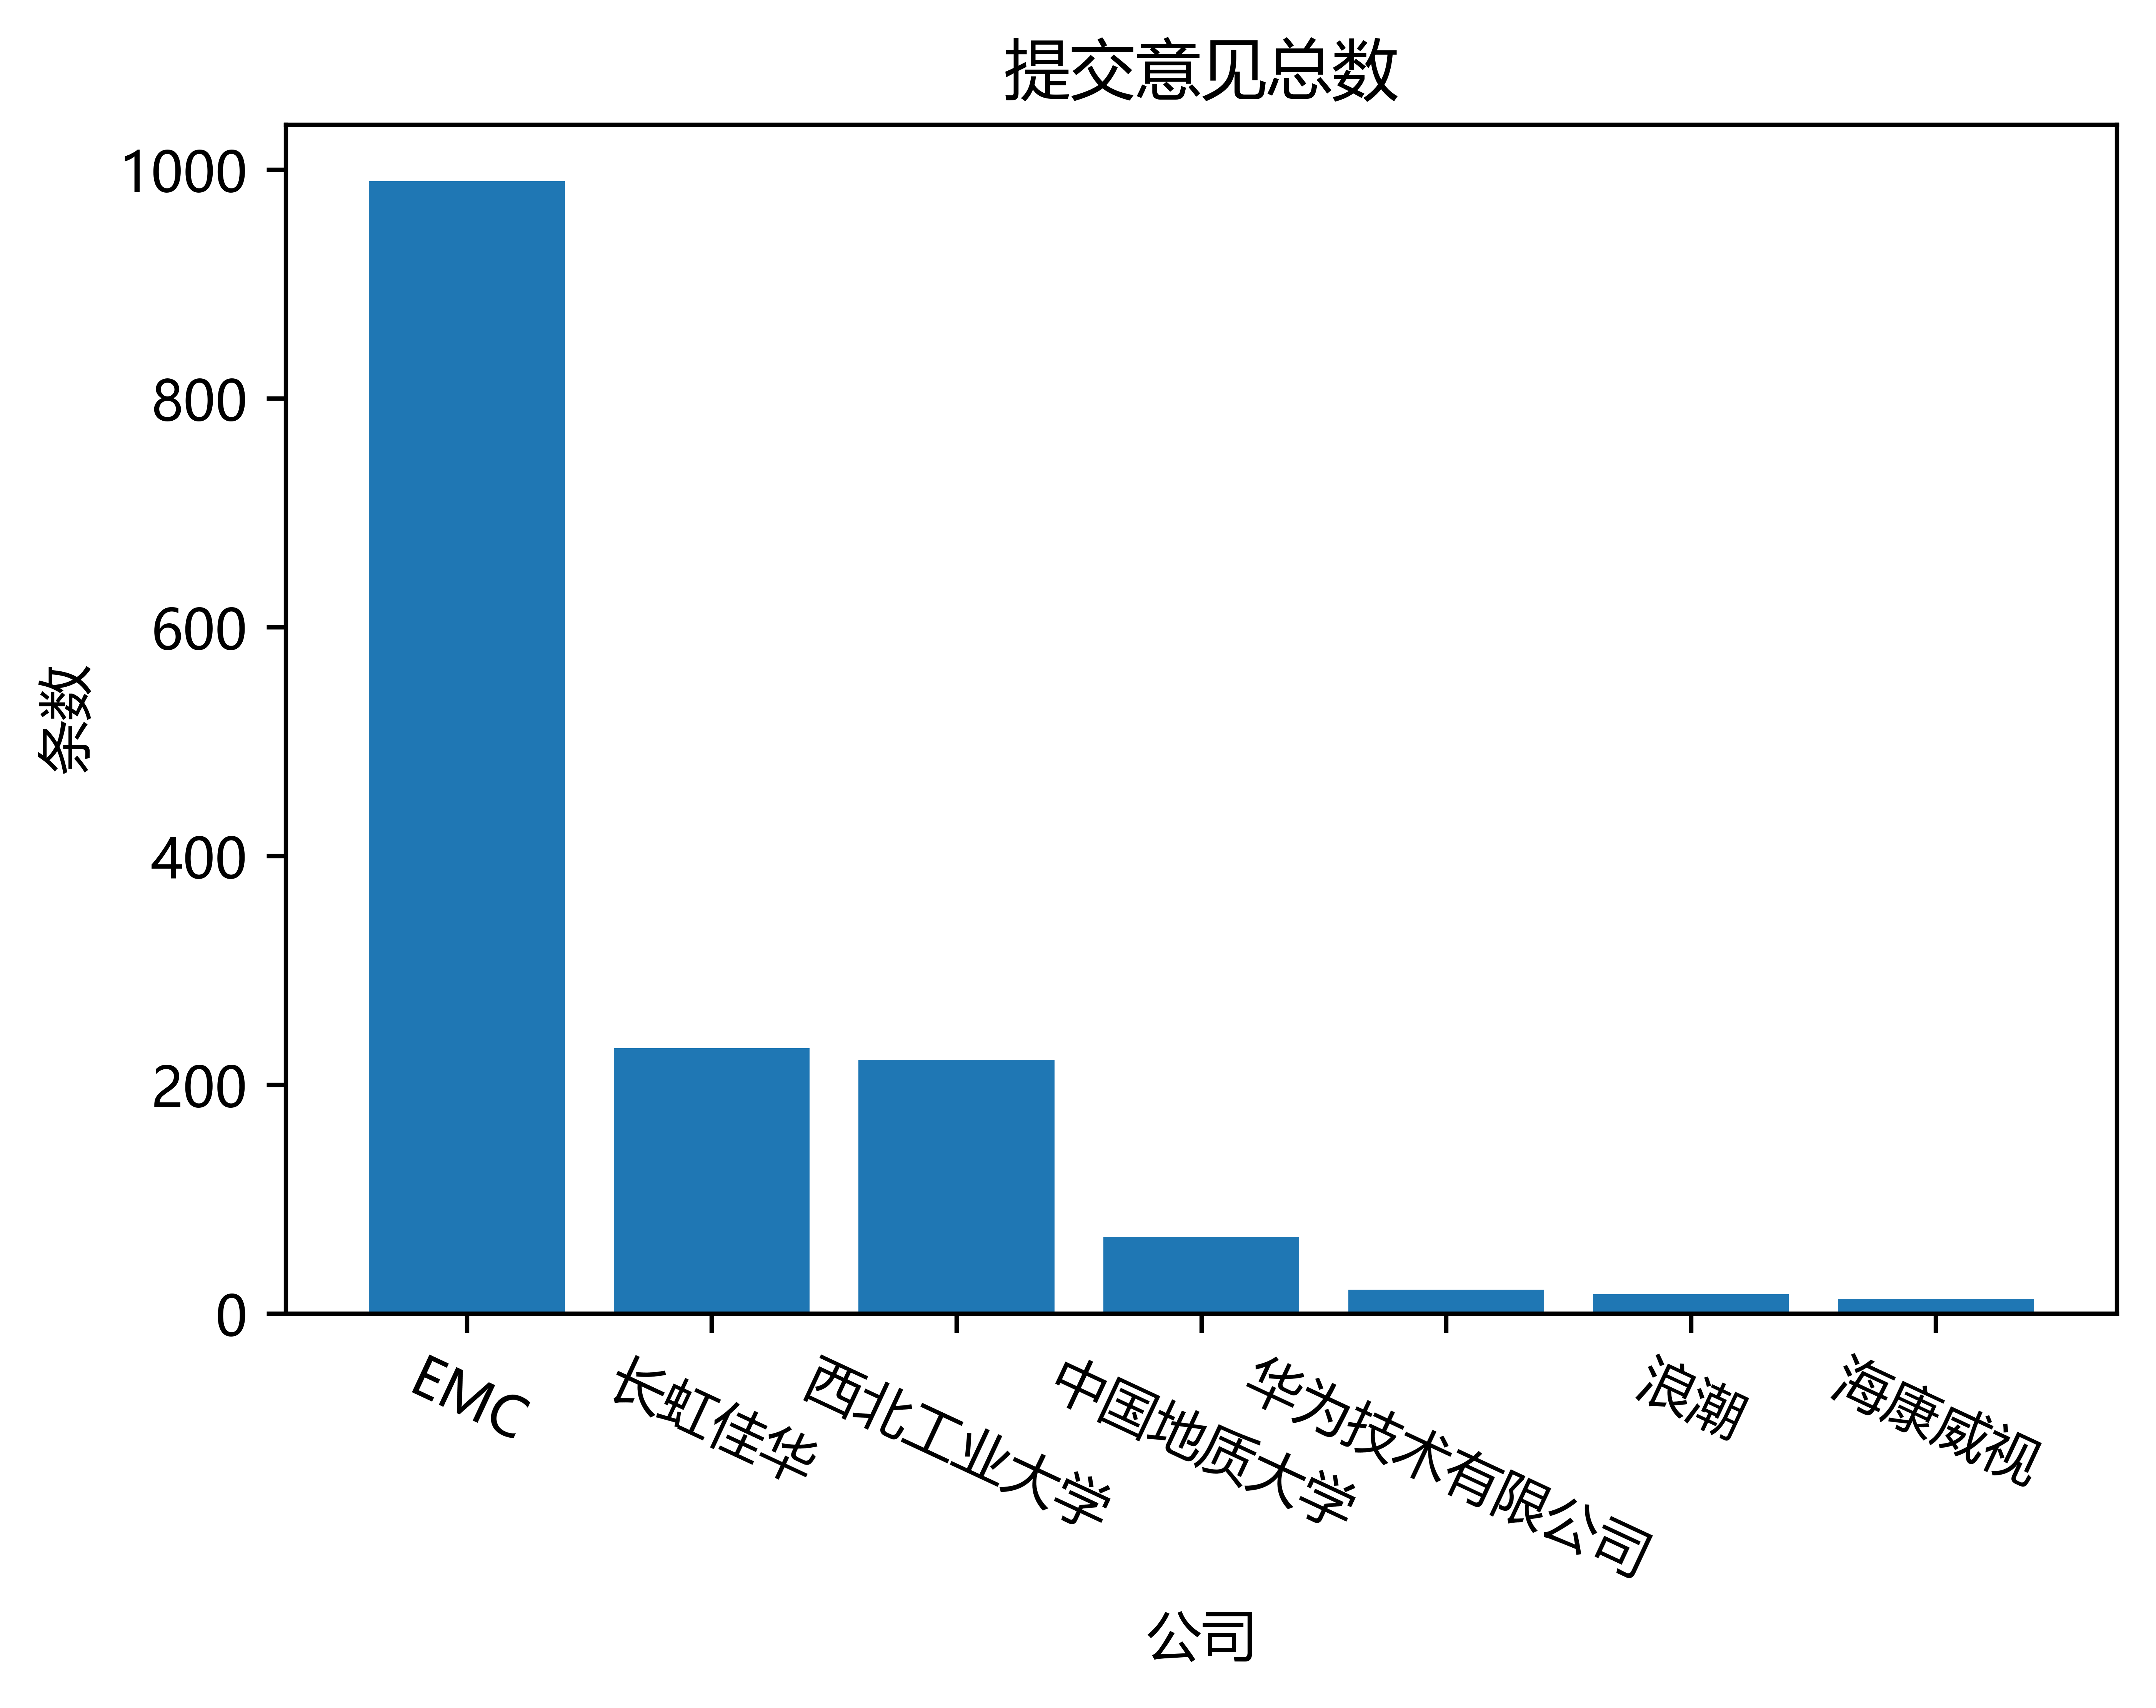

In [60]:
tmp = {}
for k,v in counters.items():
    tmp[v] = k
axis_x = sorted(tmp.keys(),reverse=True)

plt.bar([tmp[x] for x in axis_x], axis_x)

# plt.bar([tmp[x] for x in axis_x], [math.log(x) for x in axis_x])  # Or you can use log()  :)

plt.title('提交意见总数')
plt.xlabel('公司')
plt.ylabel('条数')
plt.xticks(rotation=-25)    # 设置x轴标签旋转角度
plt.show()

In [62]:
# plt.bar(counters.keys(), counters.values())
# plt.title('提交意见总数')
# plt.xlabel('公司')
# plt.ylabel('条数')
# plt.xticks(rotation=-25)    # 设置x轴标签旋转角度
# plt.show()

In [63]:
# 统计采纳情况

counters_re = {}
counters_merge = {}
for filename in filenames:
    if filename.startswith('~'):
        continue
    fpath = os.path.join(path, filename)
    
    workbook = xlrd.open_workbook(filename=fpath)
    sheet_names = workbook.sheet_names()
    for sname in sheet_names:
        worksheet  = workbook.sheet_by_name(sname)
        for i in range(worksheet.nrows):
            com = worksheet.row_values(i)[4]
            k_flag = worksheet.row_values(i)[5]
            
            if com not in counters_re.keys():
                counters_re[com] = {}
            if k_flag not in counters_re[com].keys():
                counters_re[com][k_flag] = 0
            if com not in invalid_keys:
                counters_re[com][k_flag] += 1
            
            
            if k_flag not in counters_merge.keys():
                counters_merge[k_flag] = 0
            counters_merge[k_flag] += 1
            
print(counters_re)
print(counters_merge)

{'提出单位': {'处理意见及理由': 0}, '': {'': 0}, '华中科技大学': {'': 0}, '西北工业大学': {'拒绝': 7, '采纳': 203, '待讨论': 4, '修改采纳': 7, '': 1}, '华为技术有限公司': {'采纳': 16, '': 1, '采纳，和长虹一样': 2, '采用长虹版本': 1, '其他表有类似问题': 1}, '长虹佳华': {'采纳': 225, '待讨论': 2, '拒绝': 1, '修改采纳': 3, '': 1}, 'EMC': {'采纳': 576, '': 403, '待讨论': 8, '不采纳': 3}, '海康威视': {'采纳': 12, '采纳DELL版本': 1}, '中国地质大学': {'采纳': 52, '待讨论': 12, '不采纳': 2, '修改采纳': 1}, '浪潮': {'采纳': 16, '': 1}}
{'处理意见及理由': 7, '': 463, '拒绝': 8, '采纳': 1100, '待讨论': 26, '修改采纳': 11, '采纳，和长虹一样': 2, '采用长虹版本': 1, '其他表有类似问题': 1, '不采纳': 5, '采纳DELL版本': 1}


In [64]:
t = 0
for k,v in counters_merge.items():
    if '采纳' in k:
        t += v
total = sum(counters.values())
print(t,total,t/total)

1119 1562 0.7163892445582587


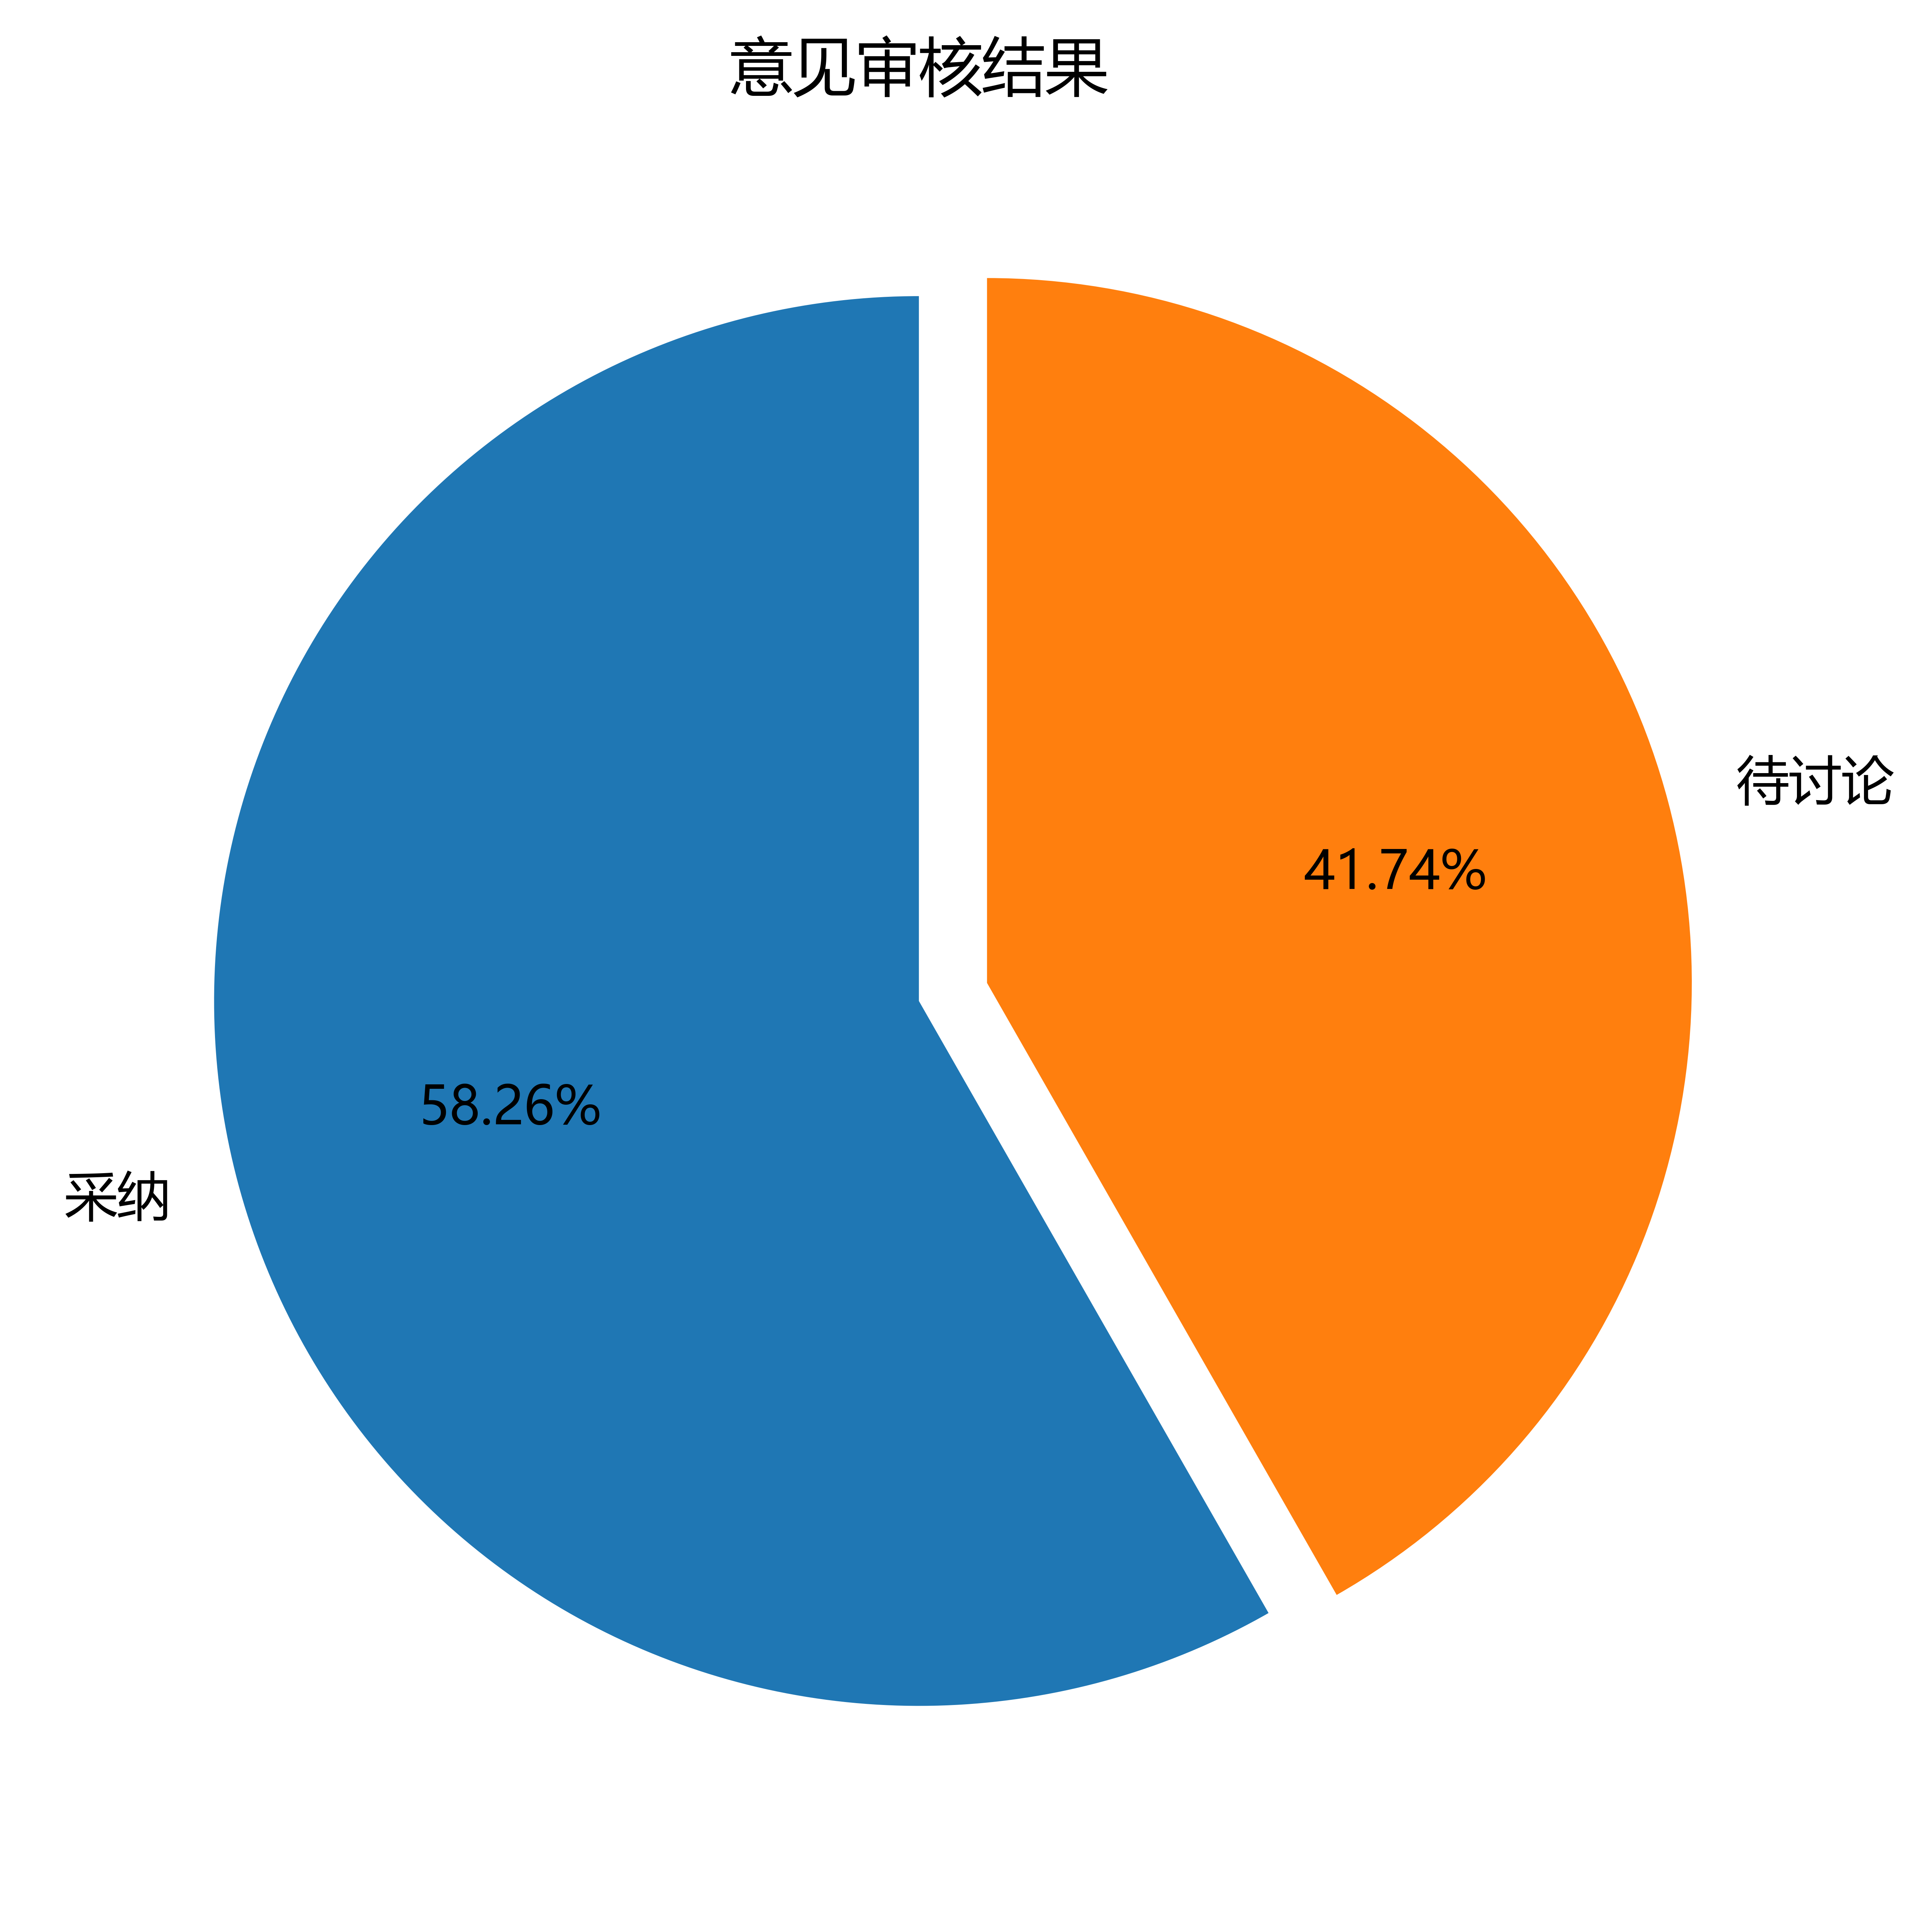

In [65]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = ['采纳','待讨论'] #定义标签
v = [total,t]
explode = (0,0.1)

plt.pie(v,explode=explode,
              labels=labels,
              autopct = '%3.2f%%', #数值保留固定小数位
              shadow = False, #无阴影设置
              startangle =90, #逆时针起始角度设置
              pctdistance = 0.6) #数值距圆心半径倍数的距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
plt.title('意见审核结果')
plt.show()

In [68]:
counters_re

{'提出单位': {'处理意见及理由': 0},
 '': {'': 0},
 '华中科技大学': {'': 0},
 '西北工业大学': {'拒绝': 7, '采纳': 203, '待讨论': 4, '修改采纳': 7, '': 1},
 '华为技术有限公司': {'采纳': 16, '': 1, '采纳，和长虹一样': 2, '采用长虹版本': 1, '其他表有类似问题': 1},
 '长虹佳华': {'采纳': 225, '待讨论': 2, '拒绝': 1, '修改采纳': 3, '': 1},
 'EMC': {'采纳': 576, '': 403, '待讨论': 8, '不采纳': 3},
 '海康威视': {'采纳': 12, '采纳DELL版本': 1},
 '中国地质大学': {'采纳': 52, '待讨论': 12, '不采纳': 2, '修改采纳': 1},
 '浪潮': {'采纳': 16, '': 1}}